# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*(numpy.sin(x))

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-((x**2)-2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [35]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    if float(N)%2==1:
        N=N+1
    else:
        N=N
    dx=(xmax-xmin)/N
    I_1=0
    I_2=0
    for i in range(1,2*N):
        x=xmin +dx*i
        if i%2==0: 
            I_1+=(dx/6)*2*f(xmin+dx*i)
        elif i%2==1:
            I_2+=(dx/6)*4*f(xmin+dx*i)
    I_3= (dx/6)*(f(xmin)+f(xmax))
    I_T=I_1 +I_2 +I_3
    
    return I_T


Make sure you have implemented Simpson's rule correctly:

In [36]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

AssertionError: 

In [37]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

AssertionError: 

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


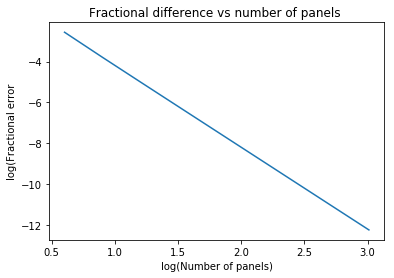

In [20]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8,16, 32,64, 128, (256), (512), (1024)]  # Panel numbers to use
ra = integrate_analytic(x0, x1)  # Define reference value from analytical solution
rn=[]
for i in range (0,9) :
    rn.append (integrate_numeric(x0,x1,panel_counts[i]))

error=(numpy.abs(ra-rn)/rn)
plt.xlabel("log(Number of panels)")
plt.ylabel("log(Fractional error")
plt.title("Fractional difference vs number of panels ")
plt.plot(numpy.log10(panel_counts),numpy.log10(error))

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As you increase the number of panels the accuracy of the numerical method increases at as constant rate till about $N=10^3$ where the error reduces at a slightly faster rate. However, if you increase the panel count further to about just under $N=10^4$ the numerical integration error increases and becomes unstable (goes up and down in jagged spikes). This is due to the fact that a computer can only compute a float to a finite precision and hence when N becomes to small, the computer cannot compute all of its digitds and hence it "guesses" the digits it cannot compute. As a result, this casues the error in the Simpson rule to break down.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The graph of the error vs panel count using the trapezium rule will have a shallower gradient than the graph of the Simpson rule. This means that for a given N, the error on the trapezium rule will be greater than the error using the Simpson rule.